In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np


In [11]:


train_df = pd.read_csv('./datasets/titanic_train.csv')
test_df = pd.read_csv('./datasets/titanic_test.csv')
test_y_df=pd.read_csv('./datasets/titanic_gender_submission.csv')
import warnings
warnings.filterwarnings('ignore')

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
train = train_df[['Pclass' , 'Sex' , 'Age' ,'Survived']]
test = test_df[['Pclass' , 'Sex' , 'Age' ]]
test_y = test_y_df['Survived']

In [14]:
train.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [15]:
train = train.dropna(axis=0)

In [17]:
# Sex labelencding
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])
train['Sex']=data

In [20]:
# Age Scaling
scaler = MinMaxScaler()
scaler.fit(train[['Age']])
data = scaler.transform(train[['Age']])

train['Age']= data

In [23]:
X = train.drop('Survived' ,axis=1)
y = train['Survived']
lr = LogisticRegression()

lr.fit(X , y)

LogisticRegression()

In [33]:
test = test.fillna(np.mean(test['Age']))
test.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [39]:
# test data preprocessing
test = test.fillna(np.mean(test['Age']))

# Sex labelencding
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex']=data

# Age Scaling
scaler = MinMaxScaler()
scaler.fit(test[['Age']])
data = scaler.transform(test[['Age']])

test['Age']= data

In [40]:
pred = lr.predict(test)

### accuracy_score , recall_score , precision_score , f1_score , confusion_matrix
#### sklearn.metrics.accuracy_score
* sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
#### sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
#### sklearn.metrics.precision_score
* sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

#### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [41]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , confusion_matrix

def get_eval(y_test , pred):
    accuarcy = accuracy_score(y_test , pred)
    recall = recall_score(y_test , pred)
    precision = precision_score(y_test , pred)
    f1score = f1_score(y_test , pred)
    matrix = confusion_matrix(y_test , pred)

    print(f'혼동 행렬은 : {matrix}')
    print(f'정확도 : {accuarcy} , 재현율 : {recall} , 정밀도:{precision} , f1스코어 : {f1score}')

In [42]:
get_eval(test_y ,pred )

혼동 행렬은 : [[252  14]
 [ 10 142]]
정확도 : 0.9425837320574163 , 재현율 : 0.9342105263157895 , 정밀도:0.9102564102564102 , f1스코어 : 0.922077922077922


In [43]:
pred_proba = lr.predict_proba(test)

In [44]:
pred = lr.predict(test)

In [46]:
pred_proba[:5]

array([[0.92140531, 0.07859469],
       [0.59987979, 0.40012021],
       [0.88759265, 0.11240735],
       [0.90468156, 0.09531844],
       [0.42576367, 0.57423633]])

In [47]:
pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

#### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [49]:
pred_proba[: , 1]

array([0.07859469, 0.40012021, 0.11240735, 0.09531844, 0.57423633,
       0.13190527, 0.5184511 , 0.258755  , 0.60152323, 0.11092072,
       0.08766123, 0.39031199, 0.93153317, 0.10962781, 0.87374957,
       0.80417134, 0.21316818, 0.11092072, 0.53950063, 0.41371357,
       0.33192653, 0.14888252, 0.91725721, 0.56417407, 0.87060983,
       0.05224505, 0.93330781, 0.10682239, 0.42429246, 0.08766123,
       0.15079163, 0.26970498, 0.49733588, 0.51653409, 0.50115909,
       0.11805713, 0.51653409, 0.5811075 , 0.10028788, 0.08766123,
       0.06989277, 0.49923973, 0.06631845, 0.77618711, 0.87983367,
       0.10028788, 0.39703466, 0.08766123, 0.82755304, 0.47623016,
       0.54329763, 0.25338977, 0.82130757, 0.92198718, 0.23635171,
       0.14534875, 0.0775809 , 0.10028788, 0.08766123, 0.90416115,
       0.12252737, 0.22768339, 0.1195313 , 0.57423633, 0.61855952,
       0.77485055, 0.60152323, 0.38363073, 0.49411816, 0.82755304,
       0.56041019, 0.11092072, 0.52547861, 0.51171876, 0.90657

In [52]:
from sklearn.metrics import precision_recall_curve

precisions , recalls , thresholds = precision_recall_curve(test_y , pred_proba[: , 1])

In [57]:
print(len(precisions[:194]) , len(recalls), len(thresholds))

194 195 194


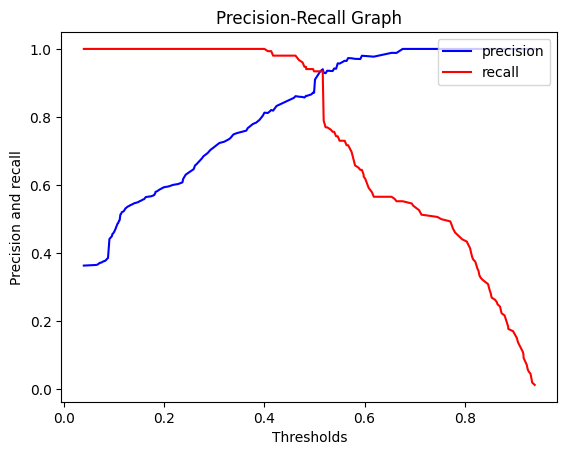

In [58]:
import matplotlib.pyplot as plt

plt.title("Precision-Recall Graph")

plt.xlabel("Thresholds"   )
plt.ylabel("Precision and recall")

plt.plot(thresholds, precisions[:194], "b", label = "precision" )
plt.plot(thresholds, recalls[:194], "r", label = "recall")

plt.legend(loc = "upper right")

plt.show()